In [1]:
from keras.models import model_from_json
from pathlib import Path
from tensorflow.keras.preprocessing import image
import numpy as np
from sklearn.metrics import accuracy_score
import joblib

2022-09-18 11:08:54.604451: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /rds/bear-apps/2021b/EL8-has/software/ZeroMQ/4.3.4-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-has/software/util-linux/2.37-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-has/software/libsodium/1.0.18-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-has/software/OpenPGM/5.2.122-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-has/software/Python/3.9.6-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-has/software/OpenSSL/1.1/lib:/rds/bear-apps/2021b/EL8-has/software/libffi/3.4.2-GCCcore-11.2.0/lib64:/rds/bear-apps/2021b/EL8-has/software/GMP/6.2.1-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-has/software/XZ/5.2.5-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-has/software/SQLite/3.36-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-has/software/Tcl/8.6.11-GCCcore-11.2.0/

In [2]:

# Load the json file that contains the model's structure
f = Path("./model/model_structure.json")
model_structure = f.read_text()

# Recreate the Keras model object from the json data
model = model_from_json(model_structure)

# Re-load the model's trained weights
model.load_weights("./model/model_weights.h5")

2022-09-18 11:09:38.990727: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /rds/bear-apps/2021b/EL8-has/software/ZeroMQ/4.3.4-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-has/software/util-linux/2.37-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-has/software/libsodium/1.0.18-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-has/software/OpenPGM/5.2.122-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-has/software/Python/3.9.6-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-has/software/OpenSSL/1.1/lib:/rds/bear-apps/2021b/EL8-has/software/libffi/3.4.2-GCCcore-11.2.0/lib64:/rds/bear-apps/2021b/EL8-has/software/GMP/6.2.1-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-has/software/XZ/5.2.5-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-has/software/SQLite/3.36-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-has/software/Tcl/8.6.11-GCCcore-11.2.0/lib:/rds/b

In [3]:
#Load image input data
# Path to folders with test data
normal_path = Path("../../multiclass-dataset/train") / "NORMAL"
pnuemonia_path = Path("../../multiclass-dataset/train") / "COVID19"

images = []
labels = []

In [4]:
count = 0
# Load all the normal images
for img in normal_path.glob("*.*"):
    if count >= 450:
        break
        
    count = count + 1
    # Load the image from disk
    img = image.load_img(img, target_size=(224,224))

    # Convert the image to a numpy array
    image_array = image.img_to_array(img)

    # Add the image to the list of images
    images.append(image_array)

    # For each 'normal' image, the expected value should be 0
    labels.append(0)


In [5]:

# Load all the pnuemonia images
count = 0
for img in pnuemonia_path.glob("*.*"):
    if count >= 450:
        break
    
    count = count + 1
    # Load the image from disk
    img = image.load_img(img, target_size=(224,224))

    # Convert the image to a numpy array
    image_array = image.img_to_array(img)

    # Add the image to the list of images
    images.append(image_array)

    # For each 'pnuemonia' image, the expected value should be 1
    labels.append(1)


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
# Create a single numpy array with all the images we loaded
X_test = np.array(images)

# Also convert the labels to a numpy array
y_true = np.array(labels)

# Normalize image data to 0-to-1 range
X_test /= 255

In [8]:
print(X_test.shape, y_true.shape)

(900, 224, 224, 3) (900,)


In [9]:
# Given the test images, make a final prediction using our own model
results = model.predict(X_test)

#Process results
p_pred = results.flatten()

# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)

29/29 [==============================] - 3s 93ms/step


[[ 63 387]
 [148 302]]


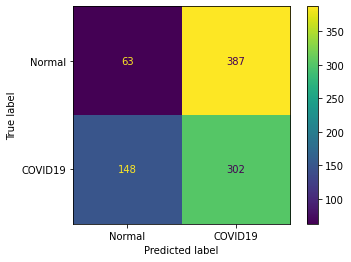

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = ['Normal', 'COVID19']
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
print(cm)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.2986    0.1400    0.1906       450
           1     0.4383    0.6711    0.5303       450

    accuracy                         0.4056       900
   macro avg     0.3684    0.4056    0.3605       900
weighted avg     0.3684    0.4056    0.3605       900

